#Muhammad Zhafran Ghaly

**M183X0348**

**M02 | Machine Learning and Front-End**

Import Library

In [28]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('always')
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadzhafranghaly","key":"530c0d4fa236d3f43f7610cd1c9c24bf"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Disini saya menggunakan Dataset dari kaggle : https://www.kaggle.com/datasets/absin7/zomato-bangalore-dataset

In [4]:
!kaggle datasets download -d absin7/zomato-bangalore-dataset

 97% 86.0M/89.0M [00:01<00:00, 63.3MB/s]
100% 89.0M/89.0M [00:01<00:00, 69.6MB/s]


In [5]:
!unzip zomato-bangalore-dataset.zip

Archive:  zomato-bangalore-dataset.zip
  inflating: dictionary_data.txt     
  inflating: zomato.csv              


In [29]:
df = pd.read_csv ('/content/zomato.csv')
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#Eksploratory Data Analysis

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Mengecek Nilai Null pada dataset

In [31]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [32]:
print('Null : ', df.isnull().sum().sum())

Null :  37700


Menangani Null dengan drop

In [33]:
df.isnull().sum()
df.dropna(how='any',inplace=True)

In [34]:
print('Null : ', df.isnull().sum().sum())

Null :  0


Tahap ini saya menghapus elemen yang tidak saya perlukan

In [35]:
df2 = df.drop([
  'url', 'dish_liked', 'phone'
], axis = 1)

Menghapus nilai yang duplikat

In [36]:
df2.duplicated().sum()
df2.drop_duplicates(inplace = True)

In [37]:
df2.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Mengubah nama kolom dan tipe data

In [38]:
df2 = df2.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})

df2['cost'] = df2['cost'].astype(str) 
df2['cost'] = df2['cost'].apply(lambda x: x.replace(',','.')) 
df2['cost'] = df2['cost'].astype(float)

Menghilangkan slash 5(/5) dari Rates

In [39]:
df2 = df2.loc[df2.rate !='NEW']
df2 = df2.loc[df2.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df2.rate = df2.rate.apply(remove_slash).str.strip().astype('float')

Output streaming akan dipotong hingga 5000 baris terakhir.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more detail

Menyesuakan nama kolom 

In [40]:
df2.name = df2.name.apply(lambda x:x.title())
df2.online_order.replace(('Ya','Tidak'),(True, False),inplace=True)
df2.book_table.replace(('Ya','Tidak'),(True, False),inplace=True)


Menghitung Rata-rata dari rating

In [41]:
restaurants = list(df2['name'].unique())
df2['Nilai Rating'] = 0

for i in range(len(restaurants)):
    df2['Nilai Rating'][df2['name'] == restaurants[i]] = df2['rate'][df2['name'] == restaurants[i]].mean()
    

scaler = MinMaxScaler(feature_range = (1,5))
df2[['Nilai Rating']] = scaler.fit_transform(df2[['Nilai Rating']]).round(2)

Output streaming akan dipotong hingga 5000 baris terakhir.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages

Mengeliminasi/menghapus kolom yang tidak diperlukan

In [42]:
df2 = df2.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)

Sampel secara acak 60% dari kerangka data yang digunakan

In [43]:
df_percent = df2.sample(frac=0.5)

#Data Preprocessing

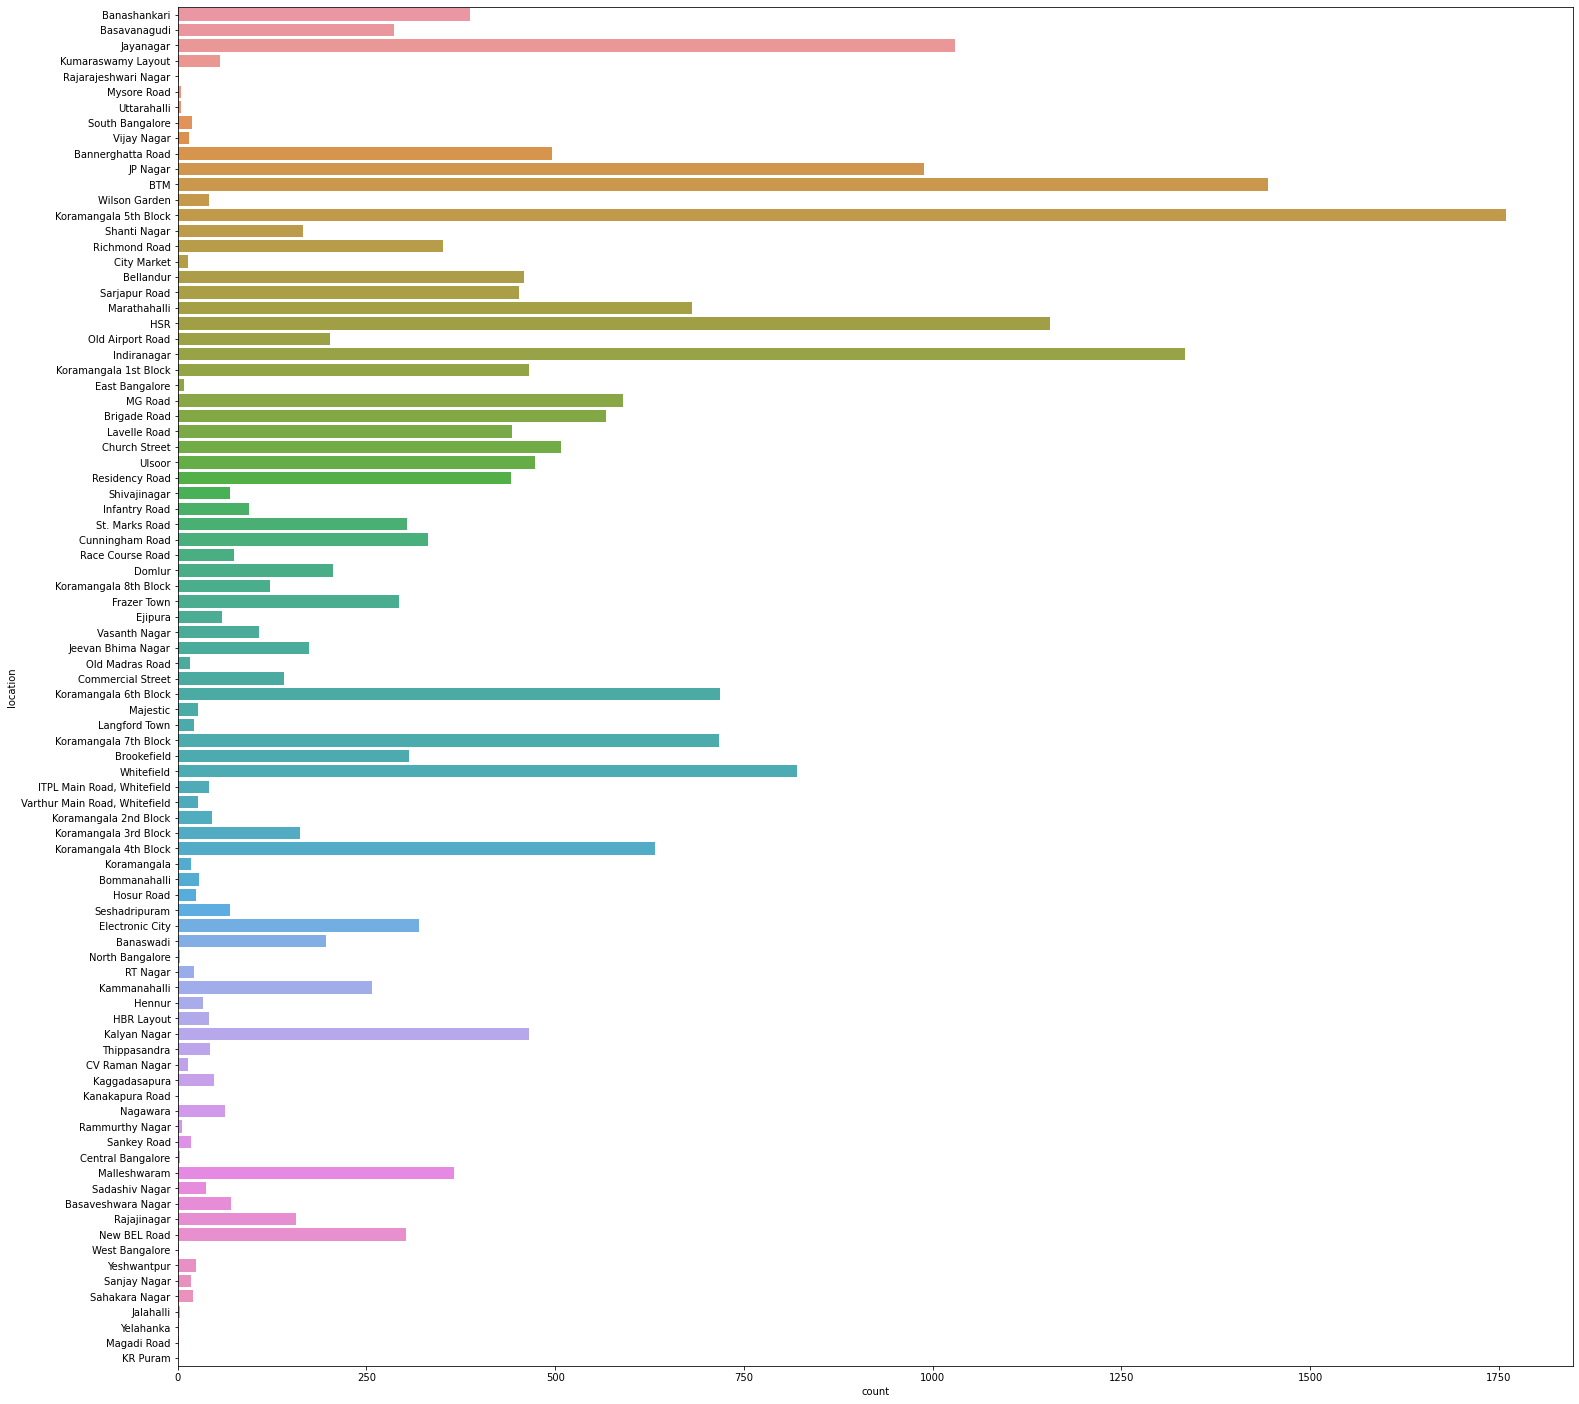

In [44]:
plt.figure(figsize=(25,25))
sns.countplot(y=df2['location'])
plt.show()

Terlihat bahwa lokasi restaurant yang memiliki pengunjung terbanyak adalah Koramangala 5th Black

#Modeling

TF-IDF (Term Frequency-Inverse Document Frequency) vektor untuk setiap dokumen. Ini akan memberi Anda matriks di mana setiap kolom mewakili sebuah kata dalam kosakata umum dan setiap kolom mewakili sebuah restoran, seperti sebelumnya.

TF-IDF adalah metode statistik untuk menilai arti kata dalam dokumen tertentu. Sekarang, saya akan menggunakan vektorisasi TF-IDF pada dataset:

In [45]:
df_percent.set_index('name', inplace=True)
indices = pd.Series(df_percent.index)

# Membuat tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

Ukuran dari Matrix TF-IDF

In [46]:
tfidf_matrix.shape

(11518, 961390)

Membuat daftar untuk menempatkan restoran teratas kemudian mencari indeks restoran yang dimasukkan. Mencari restoran dengan nilai cosinus yang sama dari nomor besar. Mengekstrak 40 indeks restoran teratas dengan nilai cosinus yang serupa. Dilanjut membuat kumpulan data baru untuk menampilkan restoran serupa dan buat 40 restoran serupa teratas dengan beberapa kolomnya. setelah itu Drop restoran bernama sama dan urutkan hanya 10 teratas berdasarkan peringkat tertinggi

In [49]:
def recommend(name, cosine_similarities = cosine_similarities):

    recommend_restaurant = []
    idx = indices[indices == name].index[0]
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    top40_indexes = list(score_series.iloc[0:41].index)
    
    for each in top40_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    df3 = pd.DataFrame(columns=['cuisines', 'Nilai Rating', 'cost'])

    for each in recommend_restaurant:
        df3 = df3.append(pd.DataFrame(df_percent[['cuisines','Nilai Rating', 'cost']][df_percent.index == each].sample()))
    
    
    df3 = df3.drop_duplicates(subset=['cuisines','Nilai Rating', 'cost'], keep=False)
    df3 = df3.sort_values(by='Nilai Rating', ascending=False).head(10)
    
    print('Top %s Restoran Serupa %s dengan review yang mirip: ' % (str(len(df3)), name))
    
    return df3
recommend('Jalsa')
    

Top 10 Restoran Serupa Jalsa dengan review yang mirip: 


,cuisines,Nilai Rating,cost
The Black Pearl,"North Indian, European, Mediterranean",4.78,1.4
Communiti,"Continental, BBQ, Salad",4.67,1.5
Hammered,"North Indian, Thai, Japanese, Continental, Cafe",4.65,1.3
The Pallet,"Continental, Mediterranean, Italian, North Ind...",4.48,1.6
The Globe Grub,"Continental, North Indian, Asian, Italian",4.48,1.3
Jalsa Gold,"North Indian, Mughlai, Italian",4.48,1.3
Brooks And Bonds Brewery,"Continental, Mediterranean, North Indian, Chin...",4.45,1.6
Delhi Highway,North Indian,4.41,1.2
Deja Vu Resto Bar,"North Indian, Italian",4.35,900.0
The Fisherman'S Wharf,"Seafood, Goan, North Indian, Continental, Asian",4.30,1.4


In [50]:
recommend('Grand Village')

Top 10 Restoran Serupa Grand Village dengan review yang mirip: 


,cuisines,Nilai Rating,cost
Village - The Soul Of India,"North Indian, Lucknowi, Gujarati, Maharashtria...",3.85,1.1
Shanthi Sagar,"South Indian, North Indian, Chinese",3.72,400.0
Shanthi Sagar,"South Indian, North Indian, Chinese, Juices",3.72,250.0
Cinnamon,"North Indian, Chinese, Biryani",3.71,550.0
Madeena Hotel,"North Indian, Mughlai, Biryani",3.71,400.0
Red Chilliez,"North Indian, South Indian, Chinese, Seafood",3.26,550.0
Red Chilliez,"North Indian, Chinese, Seafood, Mangalorean",3.26,650.0
Konaseema Grand,"North Indian, Mughlai, Andhra, Biryani",2.87,1.0
Melange - Hotel Ekaa,"North Indian, Chinese, Continental, Mangalorean",2.81,900.0
Kabab Treat,"North Indian, Chinese",2.29,500.0
